In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/depression-1/train.csv
/kaggle/input/depression-1/test.csv
/kaggle/input/suicide-watch/Suicide_Detection.csv


In [15]:
import nltk
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, StackingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn import metrics
import re

In [2]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /usr/share/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /usr/share/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /usr/share/nltk_data...


True

In [16]:
dataframe = pd.read_csv('../input/suicide-watch/Suicide_Detection.csv')

In [ ]:
# dataframe.drop(715,axis=0,inplace=True)
# dataframe = dataframe.iloc[:-1,:]
# dataframe.reset_index(inplace=True, drop=True)
# dataset = dataframe.sample(frac=1)

In [17]:
dataframe.drop(dataframe.columns[0], axis = 1, inplace=True)
dataframe = dataframe.iloc[:20000,:]
dataset = dataframe.sample(frac=1)

In [18]:
dataset.isnull()
dataset.isnull().sum()

text     0
class    0
dtype: int64

In [19]:
dataset.shape

(20000, 2)

In [20]:
dataset.head()

,text,class
5762,I'm killing myself today. any beeter painless ...,suicide
14400,might fuck around and go to sleep at 2 am inst...,non-suicide
5410,The worst is feeling good for months and then ...,suicide
18245,What should I do Today a girl laughed my joke ...,non-suicide
11308,"I’m tired of fighting, and I feel like giving ...",suicide


In [21]:
for i in range (0, len(dataset)):
    if dataset['class'][i]=="suicide":
        dataset['class'][i]="depressive"
    else:
        dataset['class'][i]="non-depressive"

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='class', ylabel='count'>

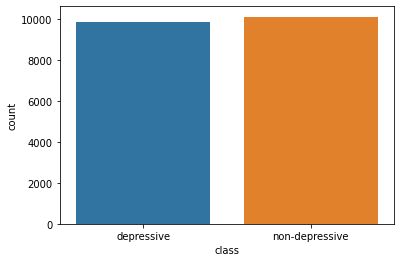

In [22]:
sns.countplot(dataset['class'])

In [23]:
dataset_texts=[]
dataset_labels=[]
for i in range (0,len(dataset)):
  dataset_texts.append(str(dataset['text'][i]))
  if dataset['class'][i]=="depressive":
    dataset_labels.append(1)
  else:
    dataset_labels.append(0)
  

In [24]:
training_texts = np.array(dataset_texts)
training_labels = np.array(dataset_labels)

In [25]:
print(len(training_texts), len(training_labels))

20000 20000


In [26]:
all_training_texts=[]
lemmatizer= WordNetLemmatizer()
stemmer= PorterStemmer()
for i in range(0, len(training_texts)):
  re_extraction=re.sub('[^a-zA-Z]', ' ', training_texts[i])
  lower_case=re_extraction.lower()
  tokenized=nltk.word_tokenize(lower_case)
  final =[lemmatizer.lemmatize(word) for word in tokenized if not word in stopwords.words('english') and len(word)>2 and word.isalpha()]
  #final =[lemmatizer.lemmatize(word) for word in stopword_removed if len(word)>1 and word.isalpha()]
  final=' '.join(final)
  all_training_texts.append(final)

In [27]:
print(len(all_training_texts))

20000


In [28]:
cv = CountVectorizer(ngram_range=(1,1), analyzer='word', min_df=5)
x_cv = cv.fit_transform(all_training_texts)
x_cv.shape

(20000, 8906)

In [29]:
cv.vocabulary_

{'wife': 8723,
 'threatening': 7958,
 'left': 4483,
 'good': 3380,
 'cheated': 1236,
 'twice': 8227,
 'lied': 4530,
 'much': 5048,
 'decided': 1944,
 'refuse': 6347,
 'back': 599,
 'day': 1906,
 'ago': 184,
 'began': 715,
 'suicide': 7662,
 'spent': 7359,
 'talking': 7801,
 'keep': 4330,
 'hesitating': 3681,
 'want': 8598,
 'believe': 733,
 'come': 1438,
 'know': 4379,
 'lot': 4656,
 'people': 5627,
 'threaten': 7956,
 'order': 5394,
 'get': 3315,
 'way': 8633,
 'happens': 3559,
 'really': 6264,
 'supposed': 7698,
 'handle': 3543,
 'death': 1928,
 'hand': 3538,
 'still': 7507,
 'love': 4661,
 'deal': 1921,
 'getting': 3317,
 'constantly': 1599,
 'feeling': 2926,
 'insecure': 4084,
 'worried': 8804,
 'today': 8031,
 'may': 4797,
 'hope': 3766,
 'happen': 3555,
 'weird': 8662,
 'affected': 152,
 'compliment': 1503,
 'coming': 1449,
 'someone': 7275,
 'irl': 4206,
 'feel': 2925,
 'internet': 4152,
 'stranger': 7541,
 'finally': 2983,
 'almost': 239,
 'never': 5160,
 'hear': 3624,
 'bad': 

In [30]:
cv.get_feature_names()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['ab',
 'abandon',
 'abandoned',
 'abandoning',
 'abandonment',
 'abdomen',
 'ability',
 'abit',
 'able',
 'abnormal',
 'abomination',
 'abort',
 'aborted',
 'abortion',
 'abraham',
 'abroad',
 'abrupt',
 'abruptly',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absorbed',
 'absurd',
 'abt',
 'abundance',
 'abuse',
 'abused',
 'abuser',
 'abusing',
 'abusive',
 'abyss',
 'academic',
 'academically',
 'academy',
 'acc',
 'accent',
 'accept',
 'acceptable',
 'acceptance',
 'accepted',
 'accepting',
 'accepts',
 'access',
 'accessible',
 'accident',
 'accidental',
 'accidentally',
 'accidently',
 'accommodation',
 'accompanied',
 'accomplish',
 'accomplished',
 'accomplishing',
 'accomplishment',
 'according',
 'account',
 'accounting',
 'accumulate',
 'accurate',
 'accurately',
 'accuse',
 'accused',
 'accusing',
 'accustomed',
 'ace',
 'acetaminophen',
 'ache',
 'achieve',
 'achieved',
 'achievement',
 'achieving',
 'aching',
 'acid',
 'acknowledge',
 'acknowledged',
 'acknowledg

In [32]:
tf_idf = TfidfVectorizer(ngram_range=(1,1), analyzer='word', min_df=5)
x_tf_idf = tf_idf.fit_transform(all_training_texts)
x_tf_idf.shape

(20000, 8906)

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x_tf_idf,training_labels,test_size=.25,random_state=0)

In [34]:
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=.2, random_state = 0)

In [35]:
x_train.shape, x_test.shape, x_val.shape

((15000, 8906), (4000, 8906), (1000, 8906))

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

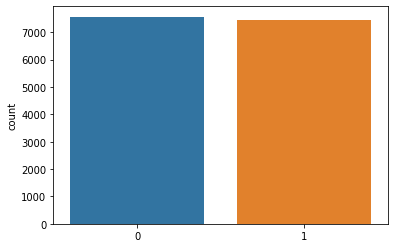

In [36]:
sns.countplot(y_train)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

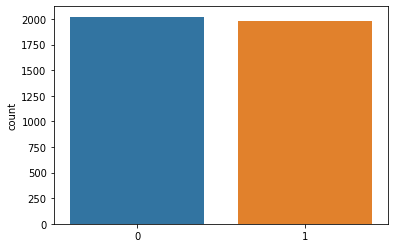

In [37]:
sns.countplot(y_test)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

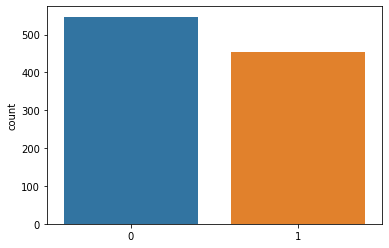

In [38]:
sns.countplot(y_val)

In [59]:
def results(test, pred):
    print('Accuracy Score: ', accuracy_score(test, pred))
    print('Confusion Matrix: \n', metrics.confusion_matrix(test, pred))
    print('Recall Score: ', recall_score(test, pred)) 
    print('Precision Score: ', precision_score(test, pred)) 
    print('F1 Score: ', f1_score(test, pred),'\n') 

In [65]:
def confus_matrix(confus_matrix):
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(confus_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confus_matrix.shape[0]):
        for j in range(confus_matrix.shape[1]):
            ax.text(x=j, y=i,s=confus_matrix[i, j], va='center', ha='center', size='xx-large')
 
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()

In [62]:
mulnb = MultinomialNB()
mulnb.fit(x_train, y_train)
y_pred_mulnb = mulnb.predict(x_test)
acc_mulnb = accuracy_score(y_test, y_pred_mulnb)
print('Test : \n')
results(y_test, y_pred_mulnb)
y_pred_mulnb_train = mulnb.predict(x_train)
print('Train : \n')
results(y_train, y_pred_mulnb_train)
y_pred_mulnb_val = mulnb.predict(x_val)
print('Validation : \n')
results(y_val, y_pred_mulnb_val)
#print(metrics.classification_report(y_test, y_pred_mulnb), confusion_matrix(y_test, y_pred_mulnb), acc_mulnb, acc_mulnb_train, acc_mulnb_val)

Test : 

Accuracy Score:  0.88325
Confusion Matrix: 
 [[1635  387]
 [  80 1898]]
Recall Score:  0.9595551061678463
Precision Score:  0.8306345733041576
F1 Score:  0.890452732817265 

Train : 

Accuracy Score:  0.9092666666666667
Confusion Matrix: 
 [[6458 1108]
 [ 253 7181]]
Recall Score:  0.9659671778315846
Precision Score:  0.8663288695861986
F1 Score:  0.9134389111492718 

Validation : 

Accuracy Score:  0.871
Confusion Matrix: 
 [[442 105]
 [ 24 429]]
Recall Score:  0.9470198675496688
Precision Score:  0.8033707865168539
F1 Score:  0.8693009118541034 



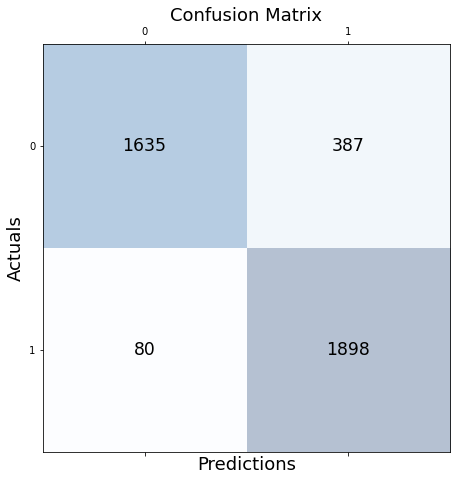

In [66]:
confus_matrix(metrics.confusion_matrix(y_test, y_pred_mulnb))

In [67]:
svc = SVC()
svc.fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)
acc_svc = accuracy_score(y_test, y_pred_svc)
print('Test: \n')
results(y_test, y_pred_svc)
y_pred_svc_train = svc.predict(x_train)
print('Train: \n')
results(y_train, y_pred_svc_train)
y_pred_svc_val = svc.predict(x_val)
print('Validation: \n')
results(y_val, y_pred_svc_val)
#print(metrics.classification_report(y_test, y_pred_svc), confusion_matrix(y_test, y_pred_svc), acc_svc, acc_svc_train, acc_svc_val)

Test: 

Accuracy Score:  0.91825
Confusion Matrix: 
 [[1874  148]
 [ 179 1799]]
Recall Score:  0.9095045500505561
Precision Score:  0.9239856189008732
F1 Score:  0.9166878980891721 

Train: 

Accuracy Score:  0.9853333333333333
Confusion Matrix: 
 [[7448  118]
 [ 102 7332]]
Recall Score:  0.9862792574656981
Precision Score:  0.9841610738255033
F1 Score:  0.985219027143241 

Validation: 

Accuracy Score:  0.916
Confusion Matrix: 
 [[511  36]
 [ 48 405]]
Recall Score:  0.8940397350993378
Precision Score:  0.9183673469387755
F1 Score:  0.9060402684563759 



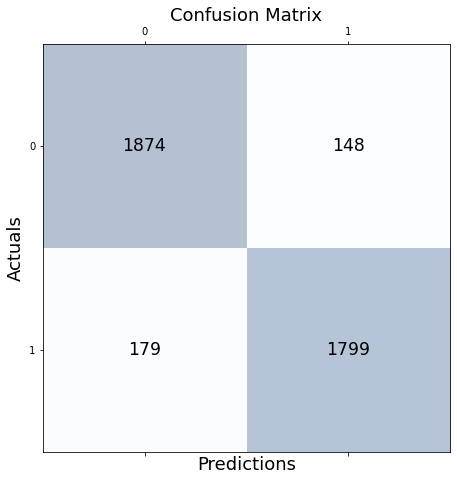

In [68]:
confus_matrix(metrics.confusion_matrix(y_test, y_pred_svc))

In [69]:
DT = DecisionTreeClassifier(criterion='entropy', splitter='best', random_state=42, class_weight='balanced')
DT.fit(x_train,y_train)
y_pred_DT = DT.predict(x_test)
acc_DT = accuracy_score(y_test, y_pred_DT)
print('Test: \n')
results(y_test, y_pred_DT)
y_pred_DT_train = DT.predict(x_train)
print('Train: \n')
results(y_train, y_pred_DT_train)
y_pred_DT_val = DT.predict(x_val)
print('Validation: \n')
results(y_val, y_pred_DT_val)
#print(metrics.classification_report(y_test, y_pred_DT), confusion_matrix(y_test, y_pred_DT), acc_DT)

Test: 

Accuracy Score:  0.83125
Confusion Matrix: 
 [[1683  339]
 [ 336 1642]]
Recall Score:  0.8301314459049545
Precision Score:  0.828874305906108
F1 Score:  0.8295023995958576 

Train: 

Accuracy Score:  0.9996
Confusion Matrix: 
 [[7566    0]
 [   6 7428]]
Recall Score:  0.9991928974979822
Precision Score:  1.0
F1 Score:  0.9995962858296327 

Validation: 

Accuracy Score:  0.847
Confusion Matrix: 
 [[472  75]
 [ 78 375]]
Recall Score:  0.8278145695364238
Precision Score:  0.8333333333333334
F1 Score:  0.8305647840531561 



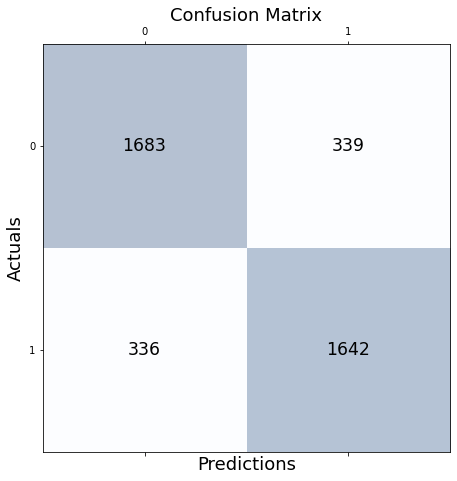

In [70]:
confus_matrix(metrics.confusion_matrix(y_test, y_pred_DT))

In [ ]:
# grid_params = {
#     "criterion" : ["gini","entropy"],
#     "splitter" : ["best","random"],
#     "class_weight" : ["balanced", None]
# }
# seed = 13
# kfold = KFold(n_splits=3, shuffle=True, random_state=seed)
# grid_search = GridSearchCV(DT, grid_params, verbose = 1, cv=kfold, scoring='r2', n_jobs = -1)
# grid_search.fit(x_train, y_train)


In [ ]:
# print(grid_search.best_score_)
# print(grid_search.best_estimator_)
# print(grid_search.best_params_)
# #grid_search.cv_results_

In [72]:
gaunb = GaussianNB()
gaunb.fit(x_train.toarray(),y_train)
y_pred_gaunb = gaunb.predict(x_test.toarray())
acc_gaunb = accuracy_score(y_test, y_pred_gaunb)
print('Test: \n')
results(y_test, y_pred_gaunb)
y_pred_gaunb_train = gaunb.predict(x_train.toarray())
print('Train: \n')
results(y_train, y_pred_gaunb_train)
y_pred_gaunb_val = gaunb.predict(x_val.toarray())
print('Validation: \n')
results(y_val, y_pred_gaunb_val)
#print(metrics.classification_report(y_test, y_pred_gaunb), confusion_matrix(y_test, y_pred_gaunb), acc_gaunb)

Test: 

Accuracy Score:  0.7585
Confusion Matrix: 
 [[1690  332]
 [ 634 1344]]
Recall Score:  0.679474216380182
Precision Score:  0.801909307875895
F1 Score:  0.7356321839080461 

Train: 

Accuracy Score:  0.85
Confusion Matrix: 
 [[7526   40]
 [2210 5224]]
Recall Score:  0.7027172450901265
Precision Score:  0.9924012158054711
F1 Score:  0.8228067412190897 

Validation: 

Accuracy Score:  0.739
Confusion Matrix: 
 [[446 101]
 [160 293]]
Recall Score:  0.6467991169977925
Precision Score:  0.7436548223350253
F1 Score:  0.69185360094451 



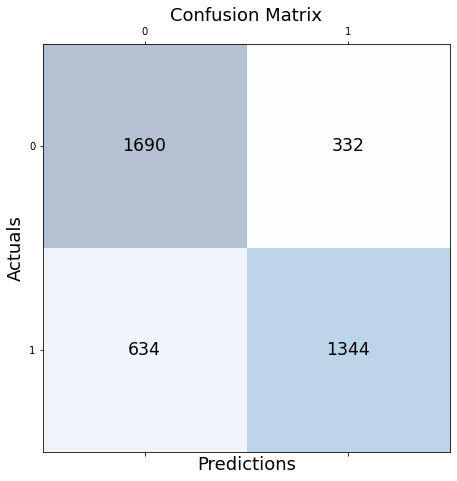

In [73]:
confus_matrix(metrics.confusion_matrix(y_test, y_pred_gaunb))

In [79]:
knn = KNeighborsClassifier(n_neighbors= 60)
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
print('Test: \n')
results(y_test, y_pred_knn)
y_pred_knn_train = knn.predict(x_train)
print('Train: \n')
results(y_train, y_pred_knn_train)
y_pred_knn_val = knn.predict(x_val)
print('Validation: \n')
results(y_val, y_pred_knn_val)
#print(metrics.classification_report(y_test, y_pred_knn), confusion_matrix(y_test, y_pred_knn), acc_knn)

Test: 

Accuracy Score:  0.869
Confusion Matrix: 
 [[1875  147]
 [ 377 1601]]
Recall Score:  0.8094034378159757
Precision Score:  0.915903890160183
F1 Score:  0.8593666129898014 

Train: 

Accuracy Score:  0.8750666666666667
Confusion Matrix: 
 [[7085  481]
 [1393 6041]]
Recall Score:  0.812617702448211
Precision Score:  0.9262496166819993
F1 Score:  0.8657208369160218 

Validation: 

Accuracy Score:  0.871
Confusion Matrix: 
 [[509  38]
 [ 91 362]]
Recall Score:  0.7991169977924945
Precision Score:  0.905
F1 Score:  0.8487690504103166 



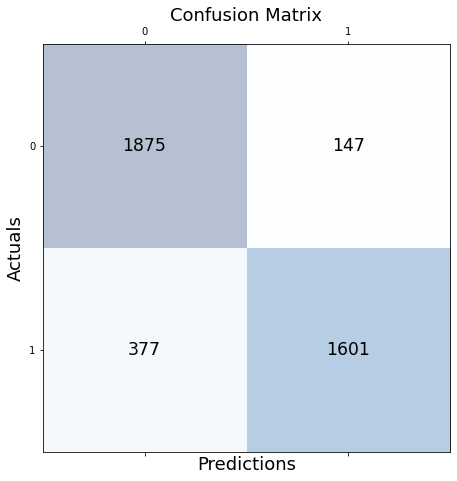

In [80]:
confus_matrix(metrics.confusion_matrix(y_test, y_pred_knn))

In [76]:
error = []
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    print(np.mean(pred_i != y_test))

0.4895
0.49125
0.49175
0.4885
0.4855
0.49025
0.487
0.4905
0.4885
0.49275
0.49175
0.49125
0.49125
0.49225
0.49225
0.49275
0.4925
0.49325
0.49275
0.49425
0.494
0.49425
0.49425
0.49425
0.49425
0.49425
0.49425
0.4945
0.49425
0.49425
0.4945
0.4945
0.4945
0.49475
0.396
0.402
0.3075
0.31525
0.257
0.26325
0.2215
0.22525
0.20075
0.208
0.1815
0.18775
0.16725
0.173
0.15675
0.1605
0.14825
0.15425
0.14275
0.1445
0.13725
0.14075
0.132
0.1345
0.13025
0.131
0.128
0.128
0.12425
0.1265
0.1235
0.1255
0.121
0.1235
0.11975
0.12125
0.121
0.1215
0.11975
0.12
0.119
0.11825
0.116
0.11625
0.1165
0.116
0.11575
0.11575
0.116
0.115
0.11675
0.1165
0.11725
0.11625
0.118
0.11675
0.11825
0.118
0.11975
0.119
0.11925
0.12025
0.1195
0.11825
0.1185


Text(0, 0.5, 'Mean Error')

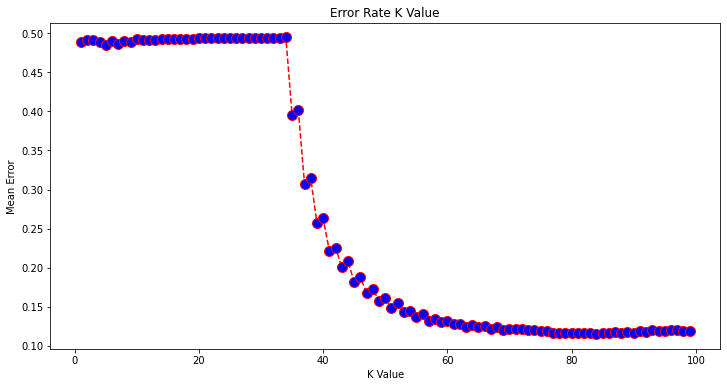

In [77]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
# grid_params = { 'n_neighbors' : [19,20,21,39,40,41,60,61,63,64,65,66],
#                'weights' : ['uniform','distance'],
#                'metric' : ['minkowski','euclidean','manhattan']}
# seed = 13
# kfold = KFold(n_splits=3, shuffle=True, random_state=seed)
# grid_search = GridSearchCV(knn, grid_params, verbose = 1, cv=kfold, scoring='r2', n_jobs = -1)
# grid_search.fit(x_train, y_train)

In [ ]:
# print(grid_search.best_score_)
# print(grid_search.best_estimator_)
# print(grid_search.best_params_)
#grid_search.cv_results_

In [81]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred_logreg = logreg.predict(x_test)
acc_logreg = accuracy_score(y_test, y_pred_logreg)
print('Test: \n')
results(y_test, y_pred_logreg)
y_pred_logreg_train = logreg.predict(x_train)
print('Train: \n')
results(y_train, y_pred_logreg_train)
y_pred_logreg_val = logreg.predict(x_val)
print('Validation: \n')
results(y_val, y_pred_logreg_val)
#print(metrics.classification_report(y_test, y_pred_logreg), confusion_matrix(y_test, y_pred_logreg), acc_logreg)

Test: 

Accuracy Score:  0.91275
Confusion Matrix: 
 [[1880  142]
 [ 207 1771]]
Recall Score:  0.8953488372093024
Precision Score:  0.9257710402509148
F1 Score:  0.9103058339758416 

Train: 

Accuracy Score:  0.9358666666666666
Confusion Matrix: 
 [[7179  387]
 [ 575 6859]]
Recall Score:  0.922652676889965
Precision Score:  0.9465912227435826
F1 Score:  0.9344686648501362 

Validation: 

Accuracy Score:  0.913
Confusion Matrix: 
 [[510  37]
 [ 50 403]]
Recall Score:  0.8896247240618101
Precision Score:  0.9159090909090909
F1 Score:  0.902575587905935 



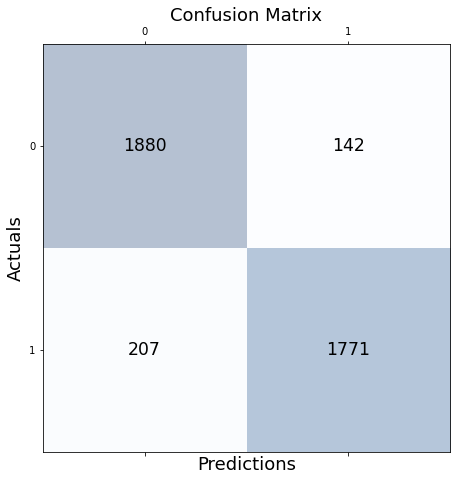

In [83]:
confus_matrix(metrics.confusion_matrix(y_test, y_pred_logreg))

In [84]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)
y_pred_linreg = linreg.predict(x_test)
print(linreg.score(x_test, y_test))
print(linreg.coef_)
# df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_linreg})
# print(df)
for i in range (0, len(y_pred_linreg)):
  if(y_pred_linreg[i]<0.5):
    y_pred_linreg[i] = 0
  else:
    y_pred_linreg[i] = 1
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_linreg})
print(df)
# acc_linreg = accuracy_score(y_test, y_pred_linreg)
# print(metrics.classification_report(y_test, y_pred_linreg), confusion_matrix(y_test, y_pred_linreg), acc_linreg)
#plt.scatter(x_test, y_test, color ='b')
# plt.plot(x_test, y_pred_linreg, color ='k')
# plt.show()

-0.24689953067477743
[-0.22567053  0.07154556  0.28606377 ... -2.84171731 -0.495721
 -0.07720064]
      Actual  Predicted
0          0        0.0
1          1        1.0
2          0        0.0
3          0        0.0
4          1        1.0
...      ...        ...
3995       1        1.0
3996       1        0.0
3997       0        0.0
3998       1        1.0
3999       0        1.0

[4000 rows x 2 columns]


In [85]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_linreg))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_linreg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_linreg)))

Mean Absolute Error: 0.1955
Mean Squared Error: 0.1955
Root Mean Squared Error: 0.44215381938868287


In [86]:
ranfor = RandomForestClassifier(class_weight=None, criterion='entropy', oob_score=True, random_state=109)
ranfor.fit(x_train, y_train)
y_pred_ranfor = ranfor.predict(x_test)
acc_ranfor = accuracy_score(y_test, y_pred_ranfor)
print('Test: \n')
results(y_test, y_pred_ranfor)
y_pred_ranfor_train = ranfor.predict(x_train)
print('Train: \n')
results(y_train, y_pred_ranfor_train)
y_pred_ranfor_val = ranfor.predict(x_val)
print('Validation: \n')
results(y_val, y_pred_ranfor_val)
#print(metrics.classification_report(y_test, y_pred_ranfor), confusion_matrix(y_test, y_pred_ranfor), acc_ranfor)

Test: 

Accuracy Score:  0.892
Confusion Matrix: 
 [[1805  217]
 [ 215 1763]]
Recall Score:  0.8913043478260869
Precision Score:  0.8904040404040404
F1 Score:  0.8908539666498232 

Train: 

Accuracy Score:  0.9996
Confusion Matrix: 
 [[7566    0]
 [   6 7428]]
Recall Score:  0.9991928974979822
Precision Score:  1.0
F1 Score:  0.9995962858296327 

Validation: 

Accuracy Score:  0.904
Confusion Matrix: 
 [[496  51]
 [ 45 408]]
Recall Score:  0.9006622516556292
Precision Score:  0.8888888888888888
F1 Score:  0.894736842105263 



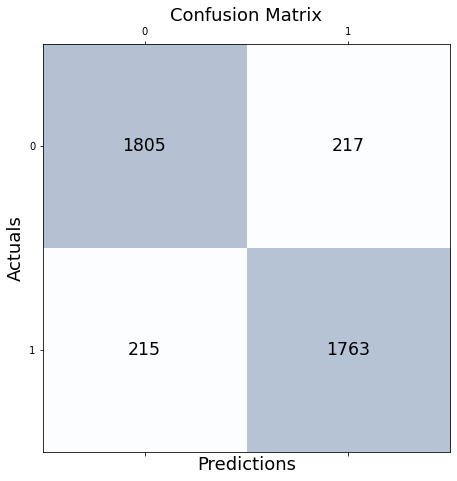

In [87]:
confus_matrix(metrics.confusion_matrix(y_test, y_pred_ranfor))

In [ ]:
# grid_params = {
#     #'bootstrap': [True, False],
#     #'max_features': ['auto', 'sqrt', 'log2'],
#     'oob_score': [True, False],
#     #'n_estimators': [50, 100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 4000, 6000, 8000, 10000, 12000, 13000],
#     #'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, None],
#     'criterion': ['mse','gini','entropy'],
#     #'warm_start': [True, False],
#     #'random_state': [0, 42, None],
#     'class_weight': ['balanced', 'balanced_subsample', None]
# }
# seed = 13
# kfold = KFold(n_splits=3, shuffle=True, random_state=seed)
# grid_search = GridSearchCV(ranfor, grid_params , cv = kfold, n_jobs = -1, verbose = 1)
# grid_search.fit(x_train, y_train)

In [ ]:
# print(grid_search.best_score_)
# print(grid_search.best_estimator_)
# print(grid_search.best_params_)

In [90]:
xgbst = XGBClassifier(learning_rate = 0.01,
                      n_estimators = 2000,
                      max_depth = 4,
                      min_child_weight = 3,
                      gamma = 0.2,
                      subsample = 0.75,
                      colsample_bytree = 0.9,
                      objective = 'binary:logistic',
                      nthread = 4,
                      scale_pos_weight = 1,
                      )
xgbst.fit(x_train, y_train)
y_pred_xgbst = xgbst.predict(x_test)
acc_xgbst = accuracy_score(y_test, y_pred_xgbst)
print('Test: \n')
results(y_test, y_pred_xgbst)
y_pred_xgbst_train = xgbst.predict(x_train)
print('Train: \n')
results(y_train, y_pred_xgbst_train)
y_pred_xgbst_val = xgbst.predict(x_val)
print('Validation: \n')
results(y_val, y_pred_xgbst_val)
#print(acc_xgbst)
#print(confusion_matrix(y_test, y_pred_xgbst))

[10:52:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Test: 

Accuracy Score:  0.89475
Confusion Matrix: 
 [[1874  148]
 [ 273 1705]]
Recall Score:  0.8619817997977756
Precision Score:  0.9201295196977873
F1 Score:  0.8901070216653616 

Train: 

Accuracy Score:  0.9222666666666667
Confusion Matrix: 
 [[7223  343]
 [ 823 6611]]
Recall Score:  0.8892924401398977
Precision Score:  0.950675870002876
F1 Score:  0.918960244648318 

Validation: 

Accuracy Score:  0.907
Confusion Matrix: 
 [[508  39]
 [ 54 399]]
Recall Score:  0.8807947019867549
Precision Score:  0.910958904109589
F1 Score:  0.8956228956228957 



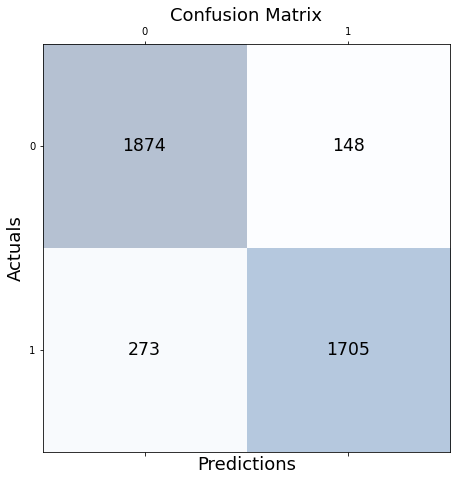

In [91]:
confus_matrix(metrics.confusion_matrix(y_test, y_pred_xgbst))

In [ ]:
# param_test1 = {
# # 'max_depth': [18, 19, 20],
# # 'min_child_weight':range(1, 20, 2),
# # 'gamma': [i/10.0 for i in range(0,5)],
# # 'subsample': [i/10.0 for i in range(6,10)],
# # 'colsample_bytree': [i/10.0 for i in range(6,10)]
# #  'subsample': [i/100.0 for i in range(75,90,5)],
# #  'colsample_bytree': [i/100.0 for i in range(75,90,5)],
# #  'reg_alpha': [1e-5, 1e-2, 0.1, 1, 100],
# #  'reg_alpha': [0, 0.001, 0.005, 0.01, 0.05]
#  # 'n_estimators':range(10,100,1),
#  # 'learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01]
#  }
# grid_search = GridSearchCV(estimator = XGBClassifier( #learning_rate =0.1, 
#                                                   #n_estimators=140, 
#                                                   #max_depth=5,
#                                                   #min_child_weight=1, 
#                                                   #gamma=0, 
#                                                   #subsample=0.8, 
#                                                   #colsample_bytree=0.8,
#                                                   objective= 'binary:logistic', 
#                                                   nthread=4, 
#                                                   scale_pos_weight=1, 
#                                                   #seed=27
#                                                   ), 
#                         param_grid = param_test1, 
#                         scoring='roc_auc',
#                         n_jobs=4, 
#                         cv=5, 
#                         verbose=2
#                         )
# grid_search.fit(x_train, y_train)

In [ ]:
# grid_search.best_params_, grid_search.best_score_

In [93]:
gbst = GradientBoostingClassifier(learning_rate=0.1, 
                                  n_estimators=420, 
                                  max_features='sqrt', 
                                  subsample=0.8, 
                                  max_depth=12,
                                  min_samples_split=2000,
                                  min_samples_leaf=2
                                  )
gbst.fit(x_train, y_train)
y_pred_gbst = gbst.predict(x_test)
acc_gbst = accuracy_score(y_test, y_pred_gbst)
print('Test: \n')
results(y_test, y_pred_gbst)
y_pred_gbst_train = gbst.predict(x_train)
print('Train: \n')
results(y_train, y_pred_gbst_train)
y_pred_gbst_val = gbst.predict(x_val)
print('Validation: \n')
results(y_val, y_pred_gbst_val)

#print(acc_gbst)
#print(confusion_matrix(y_test, y_pred_gbst))

Test: 

Accuracy Score:  0.90375
Confusion Matrix: 
 [[1863  159]
 [ 226 1752]]
Recall Score:  0.8857431749241659
Precision Score:  0.9167974882260597
F1 Score:  0.9010028284906146 

Train: 

Accuracy Score:  0.9656666666666667
Confusion Matrix: 
 [[7369  197]
 [ 318 7116]]
Recall Score:  0.9572235673930589
Precision Score:  0.9730616709968549
F1 Score:  0.9650776429104225 

Validation: 

Accuracy Score:  0.908
Confusion Matrix: 
 [[504  43]
 [ 49 404]]
Recall Score:  0.891832229580574
Precision Score:  0.9038031319910514
F1 Score:  0.8977777777777778 



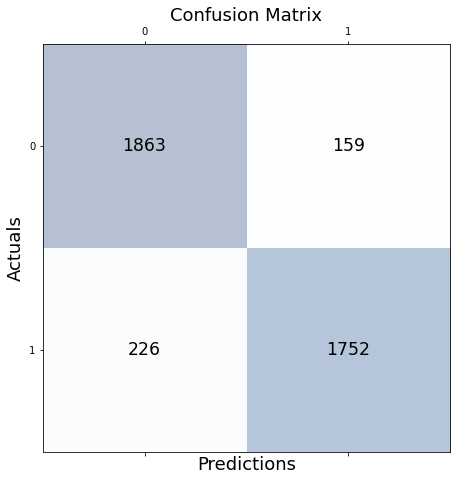

In [94]:
confus_matrix(metrics.confusion_matrix(y_test, y_pred_gbst))

In [ ]:
# param_test1 = {
# #  'max_depth': [12, 13, 14], 
# #  'min_samples_split': range(1000,2001,200),
# # 'max_features':range(200,300,2),
# # 'n_estimators':range(410,430,1),
# # 'min_samples_leaf':range(1,10,1),
# # 'learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01]
# # 'gamma': [i/10.0 for i in range(0,5)],
# # 'subsample': [i/10.0 for i in range(6,10)],
# # 'colsample_bytree': [i/10.0 for i in range(6,10)]
# #  'subsample': [i/100.0 for i in range(75,90,5)],
# #  'colsample_bytree': [i/100.0 for i in range(75,90,5)],
# #  'reg_alpha': [1e-5, 1e-2, 0.1, 1, 100],
# #  'reg_alpha': [0, 0.001, 0.005, 0.01, 0.05]
#  }
# grid_search = GridSearchCV(estimator = GradientBoostingClassifier(#learning_rate=0.1, 
#                                                                   #n_estimators=60, 
#                                                                   #max_features='sqrt', 
#                                                                   #subsample=0.8, 
#                                                                   #random_state=10
#                                                                   ), 
#                           param_grid = param_test1, 
#                           scoring='roc_auc',
#                           n_jobs=4,
#                           cv=5,
#                           verbose=2
#                           )
# grid_search.fit(x_train, y_train)

In [ ]:
# grid_search.best_params_, grid_search.best_score_

In [95]:
adabst = AdaBoostClassifier()
adabst.fit(x_train, y_train)
y_pred_adabst = adabst.predict(x_test)
acc_adabst = accuracy_score(y_test, y_pred_adabst)
print('Test: \n')
results(y_test, y_pred_adabst)
y_pred_adabst_train = adabst.predict(x_train)
print('Train: \n')
results(y_train, y_pred_adabst_train)
y_pred_adabst_val = adabst.predict(x_val)
print('Validation: \n')
results(y_val, y_pred_adabst_val)
#print(acc_adabst)
#print(confusion_matrix(y_test, y_pred_adabst))

Test: 

Accuracy Score:  0.8725
Confusion Matrix: 
 [[1843  179]
 [ 331 1647]]
Recall Score:  0.8326592517694641
Precision Score:  0.9019715224534501
F1 Score:  0.865930599369085 

Train: 

Accuracy Score:  0.8833333333333333
Confusion Matrix: 
 [[6976  590]
 [1160 6274]]
Recall Score:  0.8439601829432338
Precision Score:  0.914044289044289
F1 Score:  0.8776052594768499 

Validation: 

Accuracy Score:  0.891
Confusion Matrix: 
 [[508  39]
 [ 70 383]]
Recall Score:  0.8454746136865342
Precision Score:  0.9075829383886256
F1 Score:  0.8754285714285713 



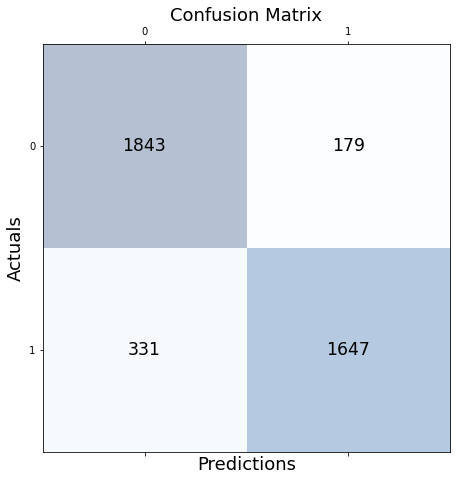

In [96]:
confus_matrix(metrics.confusion_matrix(y_test, y_pred_adabst))

In [97]:
print("Multinomial Naive Bayes Accuracy : ", acc_mulnb)
print("Support Vector Accuracy : ", acc_svc)
print("Decision Tree Accuracy : ", acc_DT)
print("Gaussian Naive Bayes Accuracy : ", acc_gaunb)
print("KNN Accuracy : ", acc_knn)
print("Logistic Regression Accuracy : ", acc_logreg)
#print("Linear Regression Accuracy : ",acc_linreg)
print("Random Forest Accuracy : ",acc_ranfor)
print("XGBoost Accuracy : ",acc_xgbst)
print("Gradient Boost Accuracy : ",acc_gbst)
print("AdaBoost Accuracy : ",acc_adabst)

Multinomial Naive Bayes Accuracy :  0.88325
Support Vector Accuracy :  0.91825
Decision Tree Accuracy :  0.83125
Gaussian Naive Bayes Accuracy :  0.7585
KNN Accuracy :  0.869
Logistic Regression Accuracy :  0.91275
Random Forest Accuracy :  0.892
XGBoost Accuracy :  0.89475
Gradient Boost Accuracy :  0.90375
AdaBoost Accuracy :  0.8725


In [103]:
bagging_list = [('Multinomial NB', mulnb), ('Support Vector', svc), ('DT', DT),('Gaussian NB', gaunb),('KNN', knn), ('Logistic Regression', logreg), ('Random Forest', ranfor), ('XGBoost', xgbst), ('Gradient Boost', gbst), ('AdaBoost', adabst)]
# no. of base classifier
num_trees = 10
acc_bagging = []
model_list = []
# bagging classifier
for name, clf in bagging_list:
  print("Method: ", clf)
  model = BaggingClassifier(base_estimator = clf,
                          n_estimators = num_trees,
                          bootstrap=True
                          )
  model_list.append(model)
  if(name == "Gaussian NB"):
      model = model.fit(x_train.toarray(), y_train)
  else:
      model = model.fit(x_train, y_train)
  y_pred_bagging = model.predict(x_test.toarray())
  acc_bagging.append((name, accuracy_score(y_test, y_pred_bagging)))
  print(model.score(x_test.toarray(), y_test))
  print(metrics.confusion_matrix(y_test, y_pred_bagging))
print("accuracy :")
print(acc_bagging)

Method:  MultinomialNB()
0.8825
[[1629  393]
 [  77 1901]]
Method:  SVC()
0.9155
[[1885  137]
 [ 201 1777]]
Method:  DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       random_state=42)
0.87075
[[1805  217]
 [ 300 1678]]
Method:  GaussianNB()
0.767
[[1678  344]
 [ 588 1390]]
Method:  KNeighborsClassifier(n_neighbors=60)
0.87525
[[1842  180]
 [ 319 1659]]
Method:  LogisticRegression()
0.91175
[[1878  144]
 [ 209 1769]]
Method:  RandomForestClassifier(criterion='entropy', oob_score=True, random_state=109)
0.889
[[1812  210]
 [ 234 1744]]
Method:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9,
              enable_categorical=False, gamma=0.2, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_est

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:06:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:09:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:15:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [104]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

In [105]:
tokenizer = Tokenizer(oov_token="<OOV>",lower=True, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', split=' ')
tokenizer.fit_on_texts(all_training_texts)
word_index = tokenizer.word_index
vocab_size = (len(word_index) + 1)
training_sequences = tokenizer.texts_to_sequences(all_training_texts)
training_padded_sequence = pad_sequences(training_sequences,padding='post',truncating='post')

In [106]:
vocab_size

34895

In [107]:
print(len(training_padded_sequence), len(training_labels))

20000 20000


In [108]:
x_train_nn, x_test_nn, y_train_nn, y_test_nn = train_test_split(training_padded_sequence,training_labels,test_size=.25,random_state=0)

In [109]:
x_test_nn, x_val_nn, y_test_nn, y_val_nn = train_test_split(x_test_nn, y_test_nn, test_size=.2, random_state = 0)

In [110]:
x_train_nn.shape, x_test_nn.shape, x_val_nn.shape

((15000, 3031), (4000, 3031), (1000, 3031))

In [111]:
max_len=len(x_train_nn[1])
max_len

3031

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

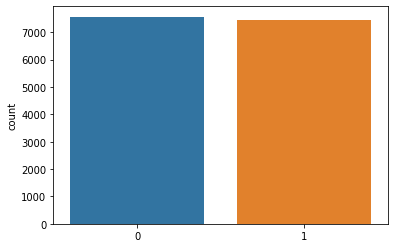

In [112]:
sns.countplot(y_train_nn)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

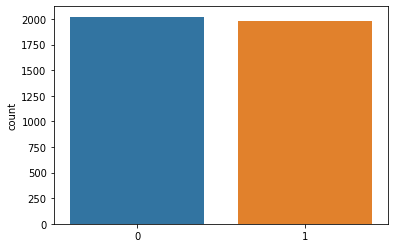

In [113]:
sns.countplot(y_test_nn)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

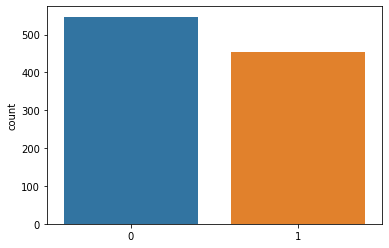

In [114]:
sns.countplot(y_val_nn)

In [118]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(output_dim=16,input_dim=max_len, input_length=max_len),
    #tf.keras.layers.Flatten(),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(units=6,activation='relu'),
    tf.keras.layers.Dense(units=1,activation='sigmoid'),
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 3031, 16)          48496     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 102       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 48,605
Trainable params: 48,605
Non-trainable params: 0
_________________________________________________________________


In [119]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(3031, 16)


In [120]:
history_test = model.fit(x=x_train_nn,y=y_train_nn,epochs=100,validation_data=(x_test_nn,y_test_nn),verbose=1)

2022-03-26 12:46:37.808767: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 181860000 exceeds 10% of free system memory.


Epoch 1/100
469/469 [==============================] - 3s 5ms/step - loss: 0.6899 - accuracy: 0.5679 - val_loss: 0.6804 - val_accuracy: 0.7010
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 0.6410 - accuracy: 0.7391 - val_loss: 0.5885 - val_accuracy: 0.7983
Epoch 3/100
469/469 [==============================] - 2s 5ms/step - loss: 0.5450 - accuracy: 0.7765 - val_loss: 0.5064 - val_accuracy: 0.7865
Epoch 4/100
469/469 [==============================] - 2s 5ms/step - loss: 0.4937 - accuracy: 0.7903 - val_loss: 0.4754 - val_accuracy: 0.7710
Epoch 5/100
469/469 [==============================] - 2s 5ms/step - loss: 0.4615 - accuracy: 0.8044 - val_loss: 0.4449 - val_accuracy: 0.8347
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 0.4366 - accuracy: 0.8229 - val_loss: 0.4170 - val_accuracy: 0.8230
Epoch 7/100
469/469 [==============================] - 2s 5ms/step - loss: 0.4099 - accuracy: 0.8340 - val_loss: 0.3923 - val_accuracy: 0.8432

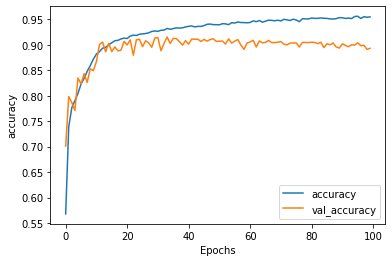

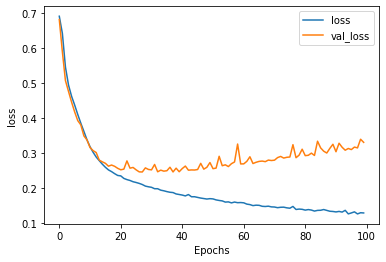

In [121]:
plot_graphs(history=history_test,string='accuracy')
plot_graphs(history=history_test,string='loss')

In [122]:
history_val = model.fit(x=x_train_nn,y=y_train_nn,epochs=100,validation_data=(x_val_nn,y_val_nn),verbose=1)

Epoch 1/100
 23/469 [>.............................] - ETA: 2s - loss: 0.1528 - accuracy: 0.9552

2022-03-26 12:52:09.287875: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 181860000 exceeds 10% of free system memory.


469/469 [==============================] - 3s 6ms/step - loss: 0.1295 - accuracy: 0.9540 - val_loss: 0.3587 - val_accuracy: 0.8970
Epoch 2/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1288 - accuracy: 0.9531 - val_loss: 0.3335 - val_accuracy: 0.8980
Epoch 3/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1279 - accuracy: 0.9543 - val_loss: 0.3393 - val_accuracy: 0.8990
Epoch 4/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1268 - accuracy: 0.9558 - val_loss: 0.3501 - val_accuracy: 0.8980
Epoch 5/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1229 - accuracy: 0.9564 - val_loss: 0.3523 - val_accuracy: 0.8980
Epoch 6/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1239 - accuracy: 0.9567 - val_loss: 0.3524 - val_accuracy: 0.8960
Epoch 7/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1263 - accuracy: 0.9554 - val_loss: 0.3408 - val_accuracy: 0.8970
Epoch 8/100

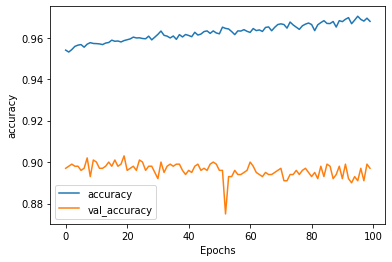

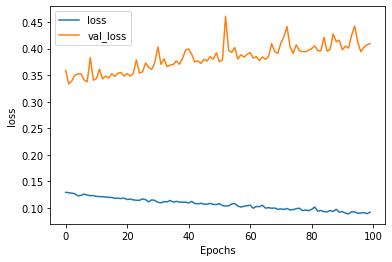

In [123]:
plot_graphs(history=history_val,string='accuracy')
plot_graphs(history=history_val,string='loss')

In [124]:
model.save("model.h5")

In [ ]:
#model = load_model('model.h5')

In [ ]:
#from keras.models import model_from_json
# serialize model to JSON
#model_json = model.to_json()
#with open("model.json", "w") as json_file:
 #   json_file.write(model_json)
# serialize weights to HDF5
#model.save_weights("model.h5")
#print("Saved model to disk")

In [ ]:
# load json and create model
#json_file = open('model.json', 'r')
#loaded_model_json = json_file.read()
#json_file.close()
#loaded_model = model_from_json(loaded_model_json)
# load weights into new model
#loaded_model.load_weights("model.h5")
#print("Loaded model from disk")

In [ ]:
model2= tf.keras.Sequential([
    tf.keras.layers.Embedding(output_dim=32,input_dim=max_len,input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, return_sequences=True)),
    #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(8, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(8)),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model2.summary()

In [ ]:
history2_test = model2.fit(x=x_train_nn,y=y_train_nn,epochs=5,validation_data=(x_test_nn,y_test_nn),verbose=1)

In [ ]:
plot_graphs(history=history2_test,string='accuracy')
plot_graphs(history=history2_test,string='loss')

In [ ]:
history2_val = model2.fit(x=x_train_nn,y=y_train_nn,epochs=5,validation_data=(x_val_nn,y_val_nn),verbose=1)

In [ ]:
plot_graphs(history=history2_val,string='accuracy')
plot_graphs(history=history2_val,string='loss')

In [133]:
def nn_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Embedding(output_dim=16,input_dim=max_len, input_length=max_len),
    #tf.keras.layers.Flatten(),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(units=6,activation='relu'),
    tf.keras.layers.Dense(units=1,activation='sigmoid'),
])
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    model.summary()
    return model

In [134]:
from keras.wrappers.scikit_learn import KerasClassifier
rnn = KerasClassifier(build_fn=nn_model, epochs=5, batch_size=10)
rnn._estimator_type = "classifier"

In [ ]:
nn_bagging = BaggingClassifier(base_estimator = model,
                          n_estimators = 5,
                          bootstrap=True
                          )
nn_bagging.fit(x_train_nn, y_train_nn)
y_pred_nn_bagging = nn_bagging.predict(x_test_nn)
acc_nn_bagging = accuracy_score(y_test_nn, y_pred_nn_bagging)
print('Test: \n')
results(y_test_nn, y_pred_nn_bagging)
y_pred_nn_bagging_train = nn_bagging.predict(x_train_nn)
print('Train: \n')
results(y_train_nn, y_pred_nn_bagging_train)
y_pred_nn_bagging_val = nn_bagging.predict(x_val_nn)
print('Validation: \n')
results(y_val_nn, y_pred_nn_bagging_val)


In [135]:

all_clf = [('Neural Network', rnn), ('Multinomial NB', mulnb), ('Support Vector', SVC(probability=True)), ('DT_bagged', model_list[2]), ('Logistic Regression', logreg), ('Random Forest', ranfor), ('KNN_bagged', model_list[4]), ('XGBoost', xgbst), ('Gradient Boost_bagged', model_list[8]), ('AdaBoost_bagged', model_list[9])]
#weights = [acc_mulnb, acc_svc, acc_knn, acc_logreg, acc_ranfor]
weights = [1, 1, 2, 1, 2, 1, 1, 1, 2, 1]
voting_clf_hard = VotingClassifier(estimators = [
                                                 (all_clf[0]),
                                                 (all_clf[1]),
                                                 (all_clf[2]),
                                                 (all_clf[3]),
                                                 (all_clf[4]),
                                                 (all_clf[5]),
                                                 (all_clf[6]),
                                                 (all_clf[7]),
                                                 (all_clf[8]),
                                                 (all_clf[9]),
                                                 ],
                                                 voting = 'hard', 
                                                 weights= weights
                                   )

voting_clf_soft = VotingClassifier(estimators = [
                                                 (all_clf[0]),
                                                 (all_clf[1]),
                                                 (all_clf[2]),
                                                 (all_clf[3]),
                                                 (all_clf[4]),
                                                 (all_clf[5]),
                                                 (all_clf[6]),
                                                 (all_clf[7]),
                                                 (all_clf[8]),
                                                 (all_clf[9]),
                                                 ],
                                                 voting = 'soft',
                                                 weights = weights
                                   )

In [ ]:
voting_clf_hard.fit(x_train_nn, y_train_nn)
voting_clf_soft.fit(x_train_nn, y_train_nn)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 3031, 16)          48496     
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 102       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 48,605
Trainable params: 48,605
Non-trainable params: 0
_________________________________________________________________


2022-03-26 13:39:46.022300: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 534360000 exceeds 10% of free system memory.
2022-03-26 13:39:46.802925: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 534360000 exceeds 10% of free system memory.


Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.6933 - accuracy: 0.4964
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.6932 - accuracy: 0.5044
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.6931 - accuracy: 0.5044
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.6932 - accuracy: 0.5019
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.6931 - accuracy: 0.5044


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [ ]:
y_pred_vhard = voting_clf_hard.predict(x_test)
y_pred_vsoft = voting_clf_soft.predict(x_test)
acc_vhard = accuracy_score(y_test,y_pred_vhard)
acc_vsoft = accuracy_score(y_test,y_pred_vsoft)
print(acc_vhard)
print(acc_vsoft)

In [ ]:
stacking = StackingClassifier(estimators = [
                                          (all_clf[0]),
                                          (all_clf[1]),
                                          #(all_clf[2],DT),
                                          #(all_clf[3],gaunb),
                                          (all_clf[2]),
                                          (all_clf[3]),
                                          #(all_clf[6],linreg),
                                          (all_clf[4])
                                          ],
                              final_estimator = (svc),
                              cv = 3,
                              #stack_method = 'predict_proba',
                              #passthrough = True
                               )

In [ ]:
stacking.fit(x_train, y_train)
y_pred_stacking = stacking.predict(x_test)
acc_stacking = accuracy_score(y_test, y_pred_stacking)
print(acc_stacking)
print(confusion_matrix(y_test, y_pred_stacking))